In [1]:
import pandas as pd

In [2]:
data = pd.read_json("D:\\SLAC\\FACET-II\\E331_06420\\PANDAS_DATASET_E331_06420.json")

In [3]:
scan_key = "QUAD_IN10_525_BDES"
vcounts = data[scan_key].value_counts()
min_shots = 10#vcounts.min()


In [4]:
# import data
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

base = ["D:","SLAC","FACET-II","E331_06420"]

img_data = []
quad_data = []

for val in sorted(vcounts.to_dict().keys()):
    quad_data += [val]
    tmp_img_data = []

    data_subset = data[data[scan_key] == val]

    for i in range(min_shots):
        fname = data_subset["PR10571"].iloc[i].split("/")[7:]
        quad_strength = val
        total_path = base + fname

        img_path = os.path.join(*total_path)
        im = np.array(Image.open(img_path))

        tmp_img_data += [im]

    img_data += [tmp_img_data]

In [5]:
img_data = np.array(img_data)
quad_data = np.array(quad_data)



In [6]:
img_data.shape

(11, 10, 876, 616)

In [7]:
quad_data.shape

(11,)

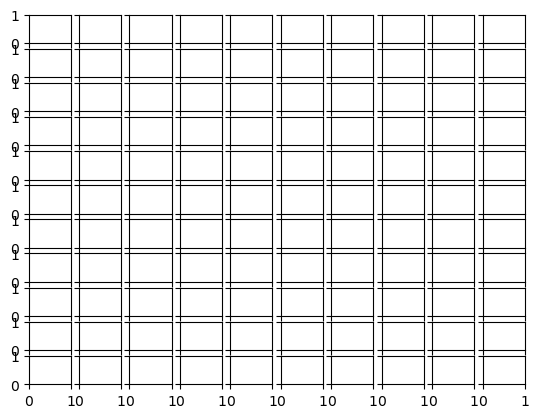

In [8]:
fig,ax = plt.subplots(11,10,sharex="all",sharey="all")

#for i in range(11):
#    for j in range(10):
#        ax[i,j].imshow(img_data[i][j])


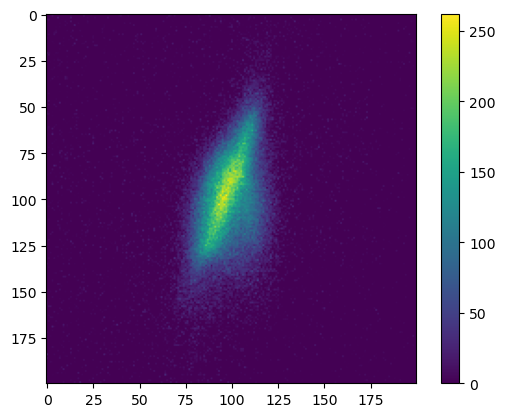

In [29]:
cropped_img_data = np.asfarray(img_data[:,:,300:700:2,100:500:2])
cropped_img_data = np.clip(cropped_img_data - 25, 0,None)
plt.imshow(cropped_img_data[10,0])
plt.colorbar()

In [30]:
np.save("image_data.npy", cropped_img_data)
np.save("quad_data.npy", quad_data)

In [10]:
from scipy.io import loadmat
metadata_path = os.path.join(*base, "E331_06420.mat")
metadata = loadmat(metadata_path,simplify_cells=True)
metadata["data_struct"]["metadata"]["PR10571"]["RESOLUTION"]

11.1732

In [11]:
plt.show()

TypeError: Invalid shape (10, 876, 616) for image data

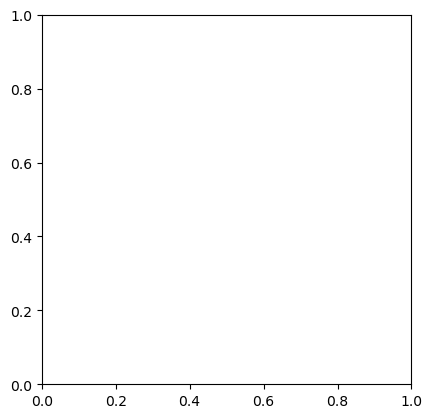

In [12]:
plt.imshow(img_data[i])


In [ ]:
np.load("image_data.npy").shape